<a href="https://colab.research.google.com/github/ylfoo/HelloWorld/blob/main/COD_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Full Scale Waste Water Treatment Plant Data**

Energy consumption, climate, and wastewater characteristics of Melbourne eastern wastewater treatment plant for preiod of six years (2014-2019). Source: https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split as split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression as LNR, Ridge, Lasso, ElasticNet as ENR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as ADA, BaggingRegressor as BAG, GradientBoostingRegressor as GBR, RandomForestRegressor as RFR
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR

from tensorflow import keras
from keras import layers
from keras.layers import LSTM, Dense
from keras.models import Sequential

Load the dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ylfoo/datasets/main/Data-Melbourne_F_fixed.csv', index_col = 0)

In [ ]:
data.shape

(1382, 19)

In [ ]:
data.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [ ]:
data.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
Average Outflow,0
Average Inflow,0
Energy Consumption,0
Ammonia,0
Biological Oxygen Demand,0
Chemical Oxygen Demand,0
Total Nitrogen,0
Average Temperature,0
Maximum temperature,0
Minimum temperature,0


In [ ]:
data.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1381
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   float64
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   float64
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average wind 

In [ ]:
atmospheric_values = [
    'Average Temperature',
    'Maximum temperature',
    'Minimum temperature',
    'Atmospheric pressure',
    'Average humidity',
    'Total rainfall',
    'Average visibility',
    'Average wind speed',
    'Maximum wind speed',
]

In [ ]:
data[atmospheric_values].head()

,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
0,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5
1,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8
2,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1
3,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9
4,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2


In [ ]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [ ]:
data.shape

(1382, 17)

In [ ]:
data.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed',
       'Date'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1381
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Average Outflow           1382 non-null   float64       
 1   Average Inflow            1382 non-null   float64       
 2   Energy Consumption        1382 non-null   float64       
 3   Ammonia                   1382 non-null   float64       
 4   Biological Oxygen Demand  1382 non-null   float64       
 5   Chemical Oxygen Demand    1382 non-null   float64       
 6   Total Nitrogen            1382 non-null   float64       
 7   Average Temperature       1382 non-null   float64       
 8   Maximum temperature       1382 non-null   float64       
 9   Minimum temperature       1382 non-null   float64       
 10  Atmospheric pressure      1382 non-null   float64       
 11  Average humidity          1382 non-null   float64       
 12  Total rainfall           

Predict COD

In [ ]:
data = data.set_index("Date")
# Define your input features (X) and target variable (y)
X = data.drop("Chemical Oxygen Demand", axis=1)  # Input features (exclude COD)
y = data["Chemical Oxygen Demand"]  # Target variable (COD)

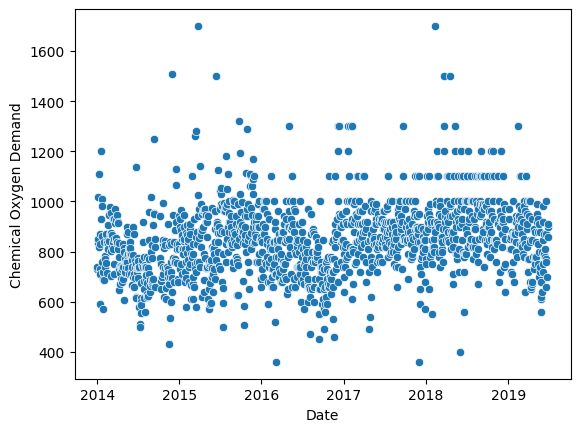

In [ ]:
sns.scatterplot(y)
plt.show()

**Machine Learning**

In [ ]:
models = {}
models['LNR'] = LNR()
models['RDG'] = Ridge()
models['LSR'] = Lasso()
models['ENR'] = ENR()
models['DTR'] = DTR()
models['ABR'] = ADA()
models['BAG'] = BAG()
models['GBR'] = GBR()
models['RFR'] = RFR()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for m in models:
    score = cross_val_score(models[m], X, y, scoring='r2', cv=kf, n_jobs=-1) # 'r2' is the default score for regressor
    print(f"{m}: R2 score is {score.mean():.3f} ± {score.std():.3f}")

LNR: R2 score is 0.550 ± 0.023
RDG: R2 score is 0.550 ± 0.023
LSR: R2 score is 0.551 ± 0.023
ENR: R2 score is 0.551 ± 0.024
DTR: R2 score is 0.515 ± 0.039
ABR: R2 score is 0.653 ± 0.012
BAG: R2 score is 0.722 ± 0.025
GBR: R2 score is 0.741 ± 0.029
RFR: R2 score is 0.750 ± 0.020


**Neural Network**

Split the data into training, validation, and test sets

In [ ]:
X_train, X_temp, y_train, y_temp = split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = split(X_temp, y_temp, test_size=0.5, random_state=42)

Standardize the data range (feature scaling)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Build a simple neural network model

In [ ]:
model_neural = Sequential()
model_neural.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_neural.add(Dense(32, activation='relu'))
model_neural.add(Dense(1))  # Output layer (1 neuron for regression)

# Compile the model
model_neural.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
neural_history = model_neural.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=50, verbose=1)

Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 732702.4375 - val_loss: 753278.3750
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 730282.4375 - val_loss: 749676.5000
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 723930.8125 - val_loss: 743622.5000
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 721153.6875 - val_loss: 733759.5625
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 704853.3750 - val_loss: 718343.9375
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 697921.2500 - val_loss: 695064.8125
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 651337.3125 - val_loss: 662555.4375
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 637507.5625 - val_loss: 619392.0625
Epoch 9/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 579366.2500 - val_loss: 565604.8125
Epoch 10/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 530529.3125 - val_loss: 503139.3125
Epoch 11/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

In [ ]:
# Make predictions on the test set
y_pred = model_neural.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE on test set: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on test set: 95.96
R-squared (R2) Score: 0.54


Define a Feedforward Neural Network (FNN) model

In [ ]:
def create_ffn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Define a Convolutional Neural Network (CNN) model

In [ ]:
def create_cnn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),  # Assuming 1D data
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Define a Recurrent Neural Network (RNN) model with LSTM cells

In [ ]:
def create_rnn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),  # Assuming 1D data
        layers.LSTM(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Train the models

In [ ]:
ffn_model = create_ffn_model()
ffn_history = ffn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=50)

cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), epochs=400, batch_size=50)

rnn_model = create_rnn_model()
rnn_history = rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), epochs=400, batch_size=50)

Epoch 1/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 719528.0000 - val_loss: 753364.5000
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 725955.5625 - val_loss: 749671.5625
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 706119.3125 - val_loss: 743655.8750
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 720401.8750 - val_loss: 734348.0000
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 699547.5000 - val_loss: 720618.0625
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 702336.8125 - val_loss: 700923.1875
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 664822.0625 - val_loss: 674278.9375
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 653926.6875 - val_loss: 639248.9375
Epoch 9/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 600218.2500 - val_loss: 596165.2500
Epoch 10/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 553508.1250 - val_loss: 545182.3125
Epoch 11/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

Test the models

In [ ]:
y_ffn_pred = ffn_model.predict(X_test)
mse_ffn = mean_squared_error(y_test, y_ffn_pred)
rmse_ffn = np.sqrt(mse_ffn)
r2_ffn = r2_score(y_test, y_ffn_pred)
print(f'FFN RMSE on test set: {rmse_ffn:.2f}')
print(f"FFN R-squared (R2) Score: {r2_ffn:.2f}")

y_cnn_pred = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
mse_cnn = mean_squared_error(y_test, y_cnn_pred)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_cnn_pred)
print(f'CNN RMSE on test set: {rmse_cnn:.2f}')
print(f"CNN R-squared (R2) Score: {r2_cnn:.2f}")

y_rnn_pred = rnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
mse_rnn = mean_squared_error(y_test, y_rnn_pred)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_rnn_pred)
print(f'RNN RMSE on test set: {rmse_rnn:.2f}')
print(f"RNN R-squared (R2) Score: {r2_rnn:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
FFN RMSE on test set: 91.36
FFN R-squared (R2) Score: 0.58


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CNN RMSE on test set: 91.16
CNN R-squared (R2) Score: 0.58


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
RNN RMSE on test set: 84.57
RNN R-squared (R2) Score: 0.64


In [28]:
model_names = ['NN', 'FFN', 'CNN', 'RNN']
r2_values = [r2, r2_ffn, r2_cnn, r2_rnn]
for i, m in enumerate(model_names):
    print(f"{m}: R2 score is {r2_values[i]:.3}")

NN: R2 score is 0.537
FFN: R2 score is 0.581
CNN: R2 score is 0.583
RNN: R2 score is 0.641
